Seth Mbasha 
S22B23/010 A99501 BSCS


In [50]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Reading the dataset
import pandas as pd
import numpy as np
credit3=pd.read_csv("ida_credits.csv")

In [52]:
credit3.columns

Index(['End of Period', 'Credit Number', 'Region', 'Country / Economy Code',
       'Country / Economy', 'Borrower', 'Credit Status', 'Service Charge Rate',
       'Currency of Commitment', 'Project ID', 'Project Name',
       'Original Principal Amount (US$)', 'Cancelled Amount (US$)',
       'Undisbursed Amount (US$)', 'Disbursed Amount (US$)',
       'Repaid to IDA (US$)', 'Due to IDA (US$)', 'Exchange Adjustment (US$)',
       'Borrowers Obligation (US$)', 'Sold 3rd Party (US$)',
       'Repaid 3rd Party (US$)', 'Due 3rd Party (US$)', 'Credits Held (US$)',
       'First Repayment Date', 'Last Repayment Date', 'Agreement Signing Date',
       'Board Approval Date', 'Effective Date (Most Recent)',
       'Closed Date (Most Recent)', 'Last Disbursement Date'],
      dtype='object')

In [53]:
credit3.nunique()

End of Period                        1
Credit Number                      188
Region                               1
Country / Economy Code               1
Country / Economy                    1
Borrower                             1
Credit Status                        8
Service Charge Rate                  2
Currency of Commitment               2
Project ID                         143
Project Name                       143
Original Principal Amount (US$)    142
Cancelled Amount (US$)             102
Undisbursed Amount (US$)            22
Disbursed Amount (US$)             181
Repaid to IDA (US$)                170
Due to IDA (US$)                    94
Exchange Adjustment (US$)            1
Borrowers Obligation (US$)          94
Sold 3rd Party (US$)                 2
Repaid 3rd Party (US$)               2
Due 3rd Party (US$)                  1
Credits Held (US$)                  96
First Repayment Date               120
Last Repayment Date                118
Agreement Signing Date   

In [54]:
credit3.isna().sum()

End of Period                       0
Credit Number                       0
Region                              0
Country / Economy Code              0
Country / Economy                   0
Borrower                            0
Credit Status                       0
Service Charge Rate                 2
Currency of Commitment              0
Project ID                          0
Project Name                        0
Original Principal Amount (US$)     0
Cancelled Amount (US$)              0
Undisbursed Amount (US$)            0
Disbursed Amount (US$)              0
Repaid to IDA (US$)                 0
Due to IDA (US$)                    0
Exchange Adjustment (US$)           0
Borrowers Obligation (US$)          0
Sold 3rd Party (US$)                0
Repaid 3rd Party (US$)              0
Due 3rd Party (US$)                 0
Credits Held (US$)                  0
First Repayment Date                0
Last Repayment Date                 0
Agreement Signing Date              2
Board Approv

In [55]:
# Interpolate missing values in each column
credit3['Service Charge Rate'] = credit3['Service Charge Rate'].interpolate()
credit3['Agreement Signing Date'] = credit3['Agreement Signing Date'].interpolate(method='time')


In [56]:
duplicates = credit3[credit3.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [End of Period, Credit Number, Region, Country / Economy Code, Country / Economy, Borrower, Credit Status, Service Charge Rate, Currency of Commitment, Project ID, Project Name, Original Principal Amount (US$), Cancelled Amount (US$), Undisbursed Amount (US$), Disbursed Amount (US$), Repaid to IDA (US$), Due to IDA (US$), Exchange Adjustment (US$), Borrowers Obligation (US$), Sold 3rd Party (US$), Repaid 3rd Party (US$), Due 3rd Party (US$), Credits Held (US$), First Repayment Date, Last Repayment Date, Agreement Signing Date, Board Approval Date, Effective Date (Most Recent), Closed Date (Most Recent), Last Disbursement Date]
Index: []

[0 rows x 30 columns]


In [57]:
# using backward fill method first, then forward fill method if necessary.
credit3['Effective Date (Most Recent)'] = credit3['Effective Date (Most Recent)'].fillna(method='bfill').fillna(method='ffill')

credit3['Last Disbursement Date'] = credit3['Last Disbursement Date'].fillna(method='bfill').fillna(method='ffill')

In [58]:
# Identify the interpolated values
interpolated_values = credit3[credit3.isna().any(axis=1)]
# Identify the interpolated values
interpolated_values = credit3[credit3.isna().any(axis=1)]

# Print the interpolated values
print(interpolated_values)

# Display the count of interpolated values for each column
print(interpolated_values.isna().sum())
# Filter columns that had their values interpolated
interpolated_columns = ['Service Charge Rate', 'Agreement Signing Date', 'Effective Date (Most Recent)', 'Last Disbursement Date']

# Display the count of interpolated values for each interpolated column
print(interpolated_values[interpolated_columns].isna().sum())

    End of Period Credit Number                       Region  \
166    2024-09-30      IDA61030  EASTERN AND SOUTHERN AFRICA   
173    2024-09-30      IDA66540  EASTERN AND SOUTHERN AFRICA   

    Country / Economy Code Country / Economy  \
166                     UG            Uganda   
173                     UG            Uganda   

                                     Borrower Credit Status  \
166  Ministry of Finance, Planning & Eco. Dev    Terminated   
173  Ministry of Finance, Planning & Eco. Dev    Terminated   

     Service Charge Rate Currency of Commitment Project ID  ...  \
166                 0.75                    XDR    P160447  ...   
173                 0.75                    XDR    P173702  ...   

    Repaid 3rd Party (US$)  Due 3rd Party (US$)  Credits Held (US$)  \
166                      0                    0                 0.0   
173                      0                    0                 0.0   

     First Repayment Date  Last Repayment Date  Agreemen

In [59]:
credit3.isna().sum()

End of Period                      0
Credit Number                      0
Region                             0
Country / Economy Code             0
Country / Economy                  0
Borrower                           0
Credit Status                      0
Service Charge Rate                0
Currency of Commitment             0
Project ID                         0
Project Name                       0
Original Principal Amount (US$)    0
Cancelled Amount (US$)             0
Undisbursed Amount (US$)           0
Disbursed Amount (US$)             0
Repaid to IDA (US$)                0
Due to IDA (US$)                   0
Exchange Adjustment (US$)          0
Borrowers Obligation (US$)         0
Sold 3rd Party (US$)               0
Repaid 3rd Party (US$)             0
Due 3rd Party (US$)                0
Credits Held (US$)                 0
First Repayment Date               0
Last Repayment Date                0
Agreement Signing Date             2
Board Approval Date                0
E

In [60]:
def count_outliers(df):
    numeric_df = df.select_dtypes(include=[np.number])
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
    return outliers

count_outliers(credit3)

Service Charge Rate                 1
Original Principal Amount (US$)    12
Cancelled Amount (US$)             28
Undisbursed Amount (US$)           22
Disbursed Amount (US$)             11
Repaid to IDA (US$)                21
Due to IDA (US$)                   28
Exchange Adjustment (US$)           0
Borrowers Obligation (US$)         28
Sold 3rd Party (US$)                1
Repaid 3rd Party (US$)              1
Due 3rd Party (US$)                 0
Credits Held (US$)                 30
dtype: int64

In [61]:
credit3.nunique()

End of Period                        1
Credit Number                      188
Region                               1
Country / Economy Code               1
Country / Economy                    1
Borrower                             1
Credit Status                        8
Service Charge Rate                  2
Currency of Commitment               2
Project ID                         143
Project Name                       143
Original Principal Amount (US$)    142
Cancelled Amount (US$)             102
Undisbursed Amount (US$)            22
Disbursed Amount (US$)             181
Repaid to IDA (US$)                170
Due to IDA (US$)                    94
Exchange Adjustment (US$)            1
Borrowers Obligation (US$)          94
Sold 3rd Party (US$)                 2
Repaid 3rd Party (US$)               2
Due 3rd Party (US$)                  1
Credits Held (US$)                  96
First Repayment Date               120
Last Repayment Date                118
Agreement Signing Date   

```markdown
### Outlier Analysis

I have decided not to remove these outliers from the dataset. The presence of outliers in this dataset can provide valuable insights and may be important for the analysi because there are a lot of outliers compared to the dataset we're having that is small.


In [62]:
unique_credit_status = credit3['Currency of Commitment'].unique()
print(unique_credit_status)

['USD' 'XDR']


In [63]:
#count the occurance of the value in the column
value_counts = credit3['Service Charge Rate'].value_counts()
print(value_counts)


Service Charge Rate
0.75    187
0.00      1
Name: count, dtype: int64


In [64]:
# Dropping unnecessary columns
columns_to_drop = ['End of Period', 'Credit Number', 'Region', 'Country / Economy Code', 'Country / Economy', 'Borrower', 
                 'Project ID', 'Project Name', 'First Repayment Date', 
                   'Last Repayment Date', 'Agreement Signing Date', 'Board Approval Date', 'Effective Date (Most Recent)', 
                   'Closed Date (Most Recent)','Due 3rd Party (US$)','Exchange Adjustment (US$)', 'Last Disbursement Date']

credit = credit3.drop(columns=columns_to_drop, axis=1)

# Display the cleaned dataframe
credit.tail()

,Credit Status,Service Charge Rate,Currency of Commitment,Original Principal Amount (US$),Cancelled Amount (US$),Undisbursed Amount (US$),Disbursed Amount (US$),Repaid to IDA (US$),Due to IDA (US$),Borrowers Obligation (US$),Sold 3rd Party (US$),Repaid 3rd Party (US$),Credits Held (US$)
183,Effective,0.00,USD,325000000.0,0.00,325000000.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,325000000.0
184,Fully Repaid,0.75,XDR,24000000.0,0.00,0.0,2.484406e+07,2.747763e+07,0.0,0.0,0,0,0.0
185,Fully Repaid,0.75,XDR,12800000.0,0.00,0.0,1.318152e+07,1.461576e+07,0.0,0.0,0,0,0.0
186,Fully Repaid,0.75,XDR,125000000.0,573760.52,0.0,1.197208e+08,1.322753e+08,0.0,0.0,0,0,0.0
187,Fully Repaid,0.75,XDR,25400000.0,0.00,0.0,2.468679e+07,2.881141e+07,0.0,0.0,0,0,0.0


In [65]:
credit.dtypes

Credit Status                       object
Service Charge Rate                float64
Currency of Commitment              object
Original Principal Amount (US$)    float64
Cancelled Amount (US$)             float64
Undisbursed Amount (US$)           float64
Disbursed Amount (US$)             float64
Repaid to IDA (US$)                float64
Due to IDA (US$)                   float64
Borrowers Obligation (US$)         float64
Sold 3rd Party (US$)                 int64
Repaid 3rd Party (US$)               int64
Credits Held (US$)                 float64
dtype: object

In [66]:
credit.nunique()

Credit Status                        8
Service Charge Rate                  2
Currency of Commitment               2
Original Principal Amount (US$)    142
Cancelled Amount (US$)             102
Undisbursed Amount (US$)            22
Disbursed Amount (US$)             181
Repaid to IDA (US$)                170
Due to IDA (US$)                    94
Borrowers Obligation (US$)          94
Sold 3rd Party (US$)                 2
Repaid 3rd Party (US$)               2
Credits Held (US$)                  96
dtype: int64

In [67]:
#count the occurance of the value in the column
value_counts = credit['Credit Status'].value_counts()
print(value_counts)


Credit Status
Fully Repaid           96
Repaying               64
Disbursing&Repaying     9
Disbursing              9
Fully Cancelled         4
Terminated              2
Fully Disbursed         2
Effective               2
Name: count, dtype: int64


In [68]:
# Identify categorical and continuous variables
categorical_vars = credit.select_dtypes(include=['object']).columns.tolist()
continuous_vars = credit.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

Categorical Variables: ['Credit Status', 'Currency of Commitment']
Continuous Variables: ['Service Charge Rate', 'Original Principal Amount (US$)', 'Cancelled Amount (US$)', 'Undisbursed Amount (US$)', 'Disbursed Amount (US$)', 'Repaid to IDA (US$)', 'Due to IDA (US$)', 'Borrowers Obligation (US$)', 'Sold 3rd Party (US$)', 'Repaid 3rd Party (US$)', 'Credits Held (US$)']


ANOVA TEST 

In [69]:
#Use ANOVA
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

Q/ target variables can be continuous or categorical for the ANOVA test?

In [70]:
#Calling the function to check which ccontinuous variables are correlated with target
ContinuousVariables= ['Service Charge Rate', 'Original Principal Amount (US$)', 'Cancelled Amount (US$)', 'Undisbursed Amount (US$)', 'Disbursed Amount (US$)', 'Repaid to IDA (US$)', 'Due to IDA (US$)', 'Borrowers Obligation (US$)', 'Sold 3rd Party (US$)', 'Repaid 3rd Party (US$)', 'Credits Held (US$)']

FunctionAnova(inpData=credit, TargetVariable='Credit Status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Service Charge Rate is correlated with Credit Status | P-Value: 5.680228160122257e-24
Original Principal Amount (US$) is correlated with Credit Status | P-Value: 7.43404550064637e-18
Cancelled Amount (US$) is correlated with Credit Status | P-Value: 8.849495950690424e-07
Undisbursed Amount (US$) is correlated with Credit Status | P-Value: 4.6472653480497606e-26
Disbursed Amount (US$) is correlated with Credit Status | P-Value: 5.4779880204440784e-12
Repaid to IDA (US$) is correlated with Credit Status | P-Value: 1.9659013182268116e-07
Due to IDA (US$) is correlated with Credit Status | P-Value: 2.71653130553732e-28
Borrowers Obligation (US$) is correlated with Credit Status | P-Value: 2.71653130553732e-28
Sold 3rd Party (US$) is NOT correlated with Credit Status | P-Value: 0.9957730640231615
Repaid 3rd Party (US$) is NOT correlated with Credit Status | P-Value: 0.9957730640231615
Credits Held (US$) is correlated with Credit Status | P-Value: 1.42530883711386

['Service Charge Rate',
 'Original Principal Amount (US$)',
 'Cancelled Amount (US$)',
 'Undisbursed Amount (US$)',
 'Disbursed Amount (US$)',
 'Repaid to IDA (US$)',
 'Due to IDA (US$)',
 'Borrowers Obligation (US$)',
 'Credits Held (US$)']

categorical Values: chisquare test

In [71]:
#Using a chisquare test function
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)


In [72]:
#Call the function to run analysis
CategoricalVariables= ['Currency of Commitment']

# Calling the function
FunctionChisq(inpData=credit, 
              TargetVariable='Credit Status',
              CategoricalVariablesList= CategoricalVariables)

Currency of Commitment is correlated with Credit Status | P-Value: 0.02383993944715986


['Currency of Commitment']

In [73]:
SelectedColumns= ['Service Charge Rate',
 'Original Principal Amount (US$)',
 'Cancelled Amount (US$)',
 'Undisbursed Amount (US$)',
 'Disbursed Amount (US$)',
 'Repaid to IDA (US$)',
 'Due to IDA (US$)',
 'Borrowers Obligation (US$)',
 'Credits Held (US$)', 'Currency of Commitment']

# Selecting final columns
DataForML=credit[SelectedColumns]
DataForML.head()

,Service Charge Rate,Original Principal Amount (US$),Cancelled Amount (US$),Undisbursed Amount (US$),Disbursed Amount (US$),Repaid to IDA (US$),Due to IDA (US$),Borrowers Obligation (US$),Credits Held (US$),Currency of Commitment
0,0.75,11879480.31,615206.08,0.0,11264274.23,11264274.23,0.0,0.0,0.0,USD
1,0.75,5916087.94,547580.98,0.0,5368506.96,5368506.96,0.0,0.0,0.0,USD
2,0.75,4025707.97,268987.55,0.0,3756720.42,3756720.42,0.0,0.0,0.0,USD
3,0.75,3498437.30,348477.54,0.0,3149959.76,3149959.76,0.0,0.0,0.0,USD
4,0.75,13032534.16,0.00,0.0,13032534.16,13032534.16,0.0,0.0,0.0,USD


In [74]:
#Or use one-hot encoding
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric

,Service Charge Rate,Original Principal Amount (US$),Cancelled Amount (US$),Undisbursed Amount (US$),Disbursed Amount (US$),Repaid to IDA (US$),Due to IDA (US$),Borrowers Obligation (US$),Credits Held (US$),Currency of Commitment_USD,Currency of Commitment_XDR
0,0.75,1.187948e+07,615206.08,0.0,1.126427e+07,1.126427e+07,0.0,0.0,0.0,True,False
1,0.75,5.916088e+06,547580.98,0.0,5.368507e+06,5.368507e+06,0.0,0.0,0.0,True,False
2,0.75,4.025708e+06,268987.55,0.0,3.756720e+06,3.756720e+06,0.0,0.0,0.0,True,False
3,0.75,3.498437e+06,348477.54,0.0,3.149960e+06,3.149960e+06,0.0,0.0,0.0,True,False
4,0.75,1.303253e+07,0.00,0.0,1.303253e+07,1.303253e+07,0.0,0.0,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
183,0.00,3.250000e+08,0.00,325000000.0,0.000000e+00,0.000000e+00,0.0,0.0,325000000.0,True,False
184,0.75,2.400000e+07,0.00,0.0,2.484406e+07,2.747763e+07,0.0,0.0,0.0,False,True
185,0.75,1.280000e+07,0.00,0.0,1.318152e+07,1.461576e+07,0.0,0.0,0.0,False,True
186,0.75,1.250000e+08,573760.52,0.0,1.197208e+08,1.322753e+08,0.0,0.0,0.0,False,True


In [75]:
# Adding Target Variable to the data
DataForML_Numeric['Credit Status']=credit['Credit Status']

# Printing sample rows
DataForML_Numeric.head()

,Service Charge Rate,Original Principal Amount (US$),Cancelled Amount (US$),Undisbursed Amount (US$),Disbursed Amount (US$),Repaid to IDA (US$),Due to IDA (US$),Borrowers Obligation (US$),Credits Held (US$),Currency of Commitment_USD,Currency of Commitment_XDR,Credit Status
0,0.75,11879480.31,615206.08,0.0,11264274.23,11264274.23,0.0,0.0,0.0,True,False,Fully Repaid
1,0.75,5916087.94,547580.98,0.0,5368506.96,5368506.96,0.0,0.0,0.0,True,False,Fully Repaid
2,0.75,4025707.97,268987.55,0.0,3756720.42,3756720.42,0.0,0.0,0.0,True,False,Fully Repaid
3,0.75,3498437.30,348477.54,0.0,3149959.76,3149959.76,0.0,0.0,0.0,True,False,Fully Repaid
4,0.75,13032534.16,0.00,0.0,13032534.16,13032534.16,0.0,0.0,0.0,True,False,Fully Repaid


Split data for training 

In [76]:
# Separate Target Variable and Predictor Variables
TargetVariable='Credit Status'
Predictors=['Service Charge Rate',
 'Original Principal Amount (US$)',
 'Cancelled Amount (US$)',
 'Undisbursed Amount (US$)',
 'Disbursed Amount (US$)',
 'Repaid to IDA (US$)',
 'Due to IDA (US$)',
 'Borrowers Obligation (US$)',
 'Credits Held (US$)', 'Currency of Commitment_USD','Currency of Commitment_XDR']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [77]:
# Split the data into training and testing set
#Training the model on 70% of the data and testing it on 30% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [78]:
# Sanity check for the sampled data (how the split has occured)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(131, 11)
(131,)
(57, 11)
(57,)


**Create and test the Decision Tree Model**

DecisionTreeClassifier(criterion='entropy', max_depth=2)
                     precision    recall  f1-score   support

         Disbursing       0.67      1.00      0.80         2
Disbursing&Repaying       0.00      0.00      0.00         4
          Effective       0.00      0.00      0.00         2
    Fully Cancelled       0.33      1.00      0.50         1
    Fully Disbursed       0.00      0.00      0.00         1
       Fully Repaid       1.00      1.00      1.00        28
           Repaying       0.83      1.00      0.90        19

           accuracy                           0.88        57
          macro avg       0.40      0.57      0.46        57
       weighted avg       0.80      0.88      0.83        57

[[ 2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  3]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0 19]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [

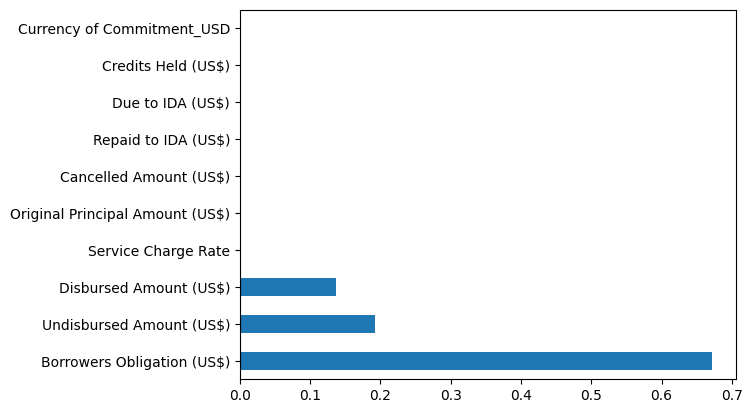

In [79]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


* Repaid to IDA, Undisbursed Amount and Borrowers Obligation are important at predicting Credit Status

**Test accuracy of model**

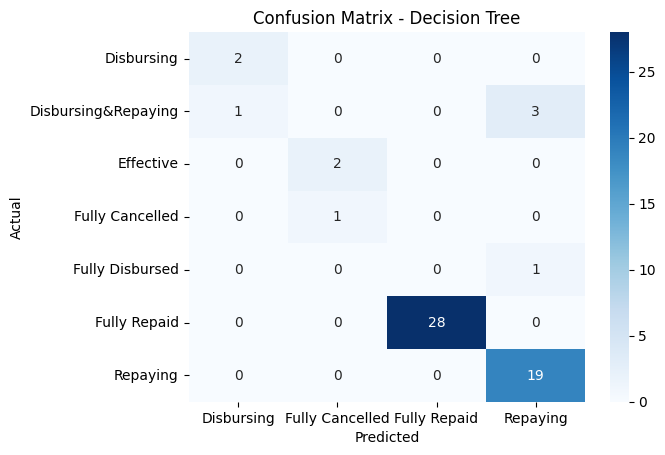

In [80]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
# Plot a confusion matrix
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

**Saving the Model**

In [81]:
#OR save the model as a joblib
import joblib
# Save the model as a joblib file
joblib.dump(clf, 'DecisionTreeModel.joblib')
print('Decision Tree Model successfully saved as joblib')

Decision Tree Model successfully saved as joblib


In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.73      1.00      0.85        30
           6       0.92      0.63      0.75        19
           7       0.00      0.00      0.00         2

    accuracy                           0.75        57
   macro avg       0.27      0.33      0.28        57
weighted avg       0.70      0.75      0.71        57

[[ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  6 12  0]
 [ 0  0  0  0  0  2  0  0]]


SVMs

In [93]:
#Using the Support Vector Machine classifier (SVC)
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.73      1.00      0.85        30
           6       0.92      0.63      0.75        19
           7       0.00      0.00      0.00         2

    accuracy                           0.75        57
   macro avg       0.27      0.33      0.28        57
weighted avg       0.70      0.75      0.71        57

[[ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  6 12  0]
 [ 0  0  0  0  0  2  0  0]]
accuracy is 0.7543859649122807


GNB Classifier 

In [82]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Split the data

In [83]:
# Select predictors and target variables
X = DataForML_Numeric.drop("Credit Status", axis=1)
y = DataForML_Numeric['Credit Status']

In [84]:
# Encoding the Species column to get numerical classes as GNB only take numeric data
le = LabelEncoder()
y = le.fit_transform(y)

In [85]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train the GNB model

In [86]:
# Gaussian Naive Bayes classifier
gnb = GaussianNB()
 
# Train the classifier on 70% of the training data
gnb.fit(X_train, y_train)

GaussianNB()

Test the model

In [94]:
# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy of Prediction on Credit Status is: {accuracy}")

The Accuracy of Prediction on Credit Status is: 0.9298245614035088


```markdown
### GNB Model is the Most Suitable Model

Based on the analysis and comparison of different models, the Gaussian Naive Bayes model has shown to be the most suitable model for predicting the credit status. The GNB model achieved a high accuracy score
```

In [95]:
import joblib

# Save the Gaussian Naive Bayes model as a joblib file
joblib.dump(gnb, 'GaussianNBModel.joblib')
print('Gaussian Naive Bayes Model successfully saved as joblib')

Gaussian Naive Bayes Model successfully saved as joblib


Link to Kaggle

https://www.kaggle.com/models/mbashas/gnb-model-ida

https://www.kaggle.com/code/mbashas/bigdata1